Made by: Julian Bernat s464782, Lucia Alvarez Hereda s4755545



#**A. Root finding for scalar nonlinear equations**

In [37]:
import numpy as np
import matplotlib.pyplot as plt

FIXED-POINT ITERATION

In [38]:
# Function that finds the fixed point of a certain function phi
#
# Possible usages:
# x, success, errEst, xHist = fpIterator(phi, x0, tol, maxit)
# x, success, errEst, xHist = fpIterator(phi, x0, tol)
# x, success, errEst, xHist = fpIterator(phi, x0)
# x, success, errEst, _ = fpIterator(phi, x0, tol, maxit)
# x, success, errEst, _ = fpIterator(phi, x0, tol)
# x, success, errEst, _ = fpIterator(phi, x0)
#
# INPUT:
# phi           iteration function (function handle)
# x0            initial guess for the root
# tol           desired tolerance to stop iterations
# maxit         maximum number of iterations
#
# OUTPUT:
# x             solution at the final iteration
# success       true means converged according to error estimator
# errEst        array with error estimate per iterations
# xHist         array with solutions per iterations


#We define the iterator function
def fpIterator(phi, x0, tol=1e-8, maxit=20):

    # initialize your output variables here (x, errEst, xHist)
    errEst = []
    xHist = [x0]
    success = False
    x=x0
    for i in range(maxit):
        try:
            1/(xHist[i]-1)
        except ZeroDivisionError:
            x=xHist[i]
            break
        xHist.append(phi(xHist[i]))
        errEst.append(abs(xHist[i+1]-xHist[i]))
        if abs(errEst[i])<tol:
            success = True
            x = xHist[i+1]
            break
    # loop (at most maxit iterations) to find the root; possible strategies
    # >>> for loop (recommended)
    # >>> while loop
    # inside the loop you will have to compute the new guess for the root and
    # check for convergence, i.e. check if the error at the current iteration
    # reached the tolerance
    # if yes >>> break
    # if no >>> update the previous iteration x and iterate again

    # finally, update the success variable

    return x, success, errEst, xHist


In [39]:
#Define phi
def phi1(x):
    return(1/(x-1))

In [40]:
x, s, err, hist = fpIterator(phi1, -2, 1e-6, 20)
print(x)

-0.6180341640996919


In [41]:
#Check for which values of x0 the fixed point iterations converge
xvals = np.arange(-3,3.5,0.5)
for i in range((len(xvals))):
    x, s, err, hist = fpIterator(phi1,xvals[i],1e-6,20)
    print(xvals[i],x,s,hist,err)

-3.0 -0.6180342255375164 True [-3.0, -0.25, -0.8, -0.5555555555555556, -0.6428571428571428, -0.6086956521739131, -0.6216216216216216, -0.6166666666666667, -0.6185567010309279, -0.6178343949044586, -0.6181102362204725, -0.6180048661800487, -0.618045112781955, -0.6180297397769516, -0.6180356117174038, -0.6180333688320909, -0.6180342255375164] [2.75, 0.55, 0.24444444444444446, 0.08730158730158721, 0.03416149068322971, 0.012925969447708519, 0.004954954954954904, 0.0018900343642611617, 0.0007223061264692854, 0.0002758413160138806, 0.00010537004042376896, 4.024660190626861e-05, 1.5373005003316287e-05, 5.8719404522067364e-06, 2.242885312919718e-06, 8.567054254893236e-07]
-2.5 -0.6180341985484069 True [-2.5, -0.2857142857142857, -0.7777777777777779, -0.5625, -0.64, -0.6097560975609756, -0.6212121212121212, -0.6168224299065421, -0.6184971098265896, -0.6178571428571428, -0.6181015452538631, -0.6180081855388813, -0.6180438448566611, -0.618030224075039, -0.6180354267310789, -0.6180334394904459, -0

<ipython-input-38-34269e3aee1a>:34: RuntimeWarning: divide by zero encountered in scalar divide
  1/(xHist[i]-1)
<ipython-input-39-1d2bf222a3e9>:3: RuntimeWarning: divide by zero encountered in scalar divide
  return(1/(x-1))


**DISCUSSION QUESTION A.1:** For which values does the fixed point iterations converge, and for which values it does
not?


From the tutorial we see that x ϵ [-1,-0.5] converges first for 15 iterations. And for 16 iterations, everything that's in the interval [-3,0] converges. And for 17 iterations onwards, every value from in [-3,3] converges.

The convergence order is 0.9997594917292497
The asymptotic convergence factor is 0.3820246848739496


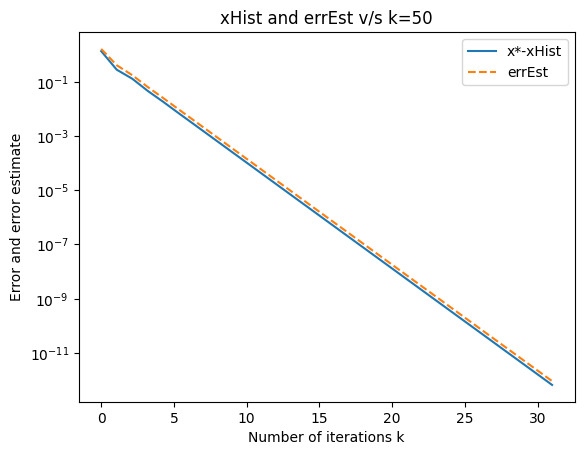

In [42]:
# Changing tolerance, initial conditions and number of iterations we plot the error estimate and the error itself v/s the number
# of iterations k

e = 2.718
x_1 = (1 + np.sqrt(5))/2
x_2 = (1 - np.sqrt(5))/2
x2, s2, err2, hist2 = fpIterator(phi1,-2, 1e-12, 50)
xvals_error = np.linspace(0,len(hist2),len(hist2)-1)
list_of_errors2 = []
for k in range(len(hist2)-1):
    list_of_errors2.append(abs(x_2-hist2[k]))

convergence_order = []
for i in range(len(list_of_errors2)-2):
    convergence_order.append((np.log(list_of_errors2[i+2]/list_of_errors2[i+1]))/(np.log(list_of_errors2[i+1]/list_of_errors2[i])))
n = 2
asym_convergence = (list_of_errors2[-1])/(list_of_errors2[-2]) #fix
plt.figure(2)
plt.semilogy(xvals_error,list_of_errors2)
plt.semilogy(xvals_error,err2, '--')
plt.legend(['x*-xHist', 'errEst'])
plt.xlabel('Number of iterations k')
plt.ylabel('Error and error estimate')
plt.title('xHist and errEst v/s k=50')
print(f"The convergence order is {convergence_order[-1]}")
print(f"The asymptotic convergence factor is {asym_convergence}")

**DISCUSSION QUESTION A.2:** Explain values of convergence order and aysmptotic convergence factor as well as why the error is smaller than the error estimate


The convergence order is approximately 1. The asymptotic convergence factor is approximately 0.38. This is because if the iteration converges to some fixed-point x, then the difference of subsequent iterations with this fixed point will converge for φ(x*)≠0 then the convergence order is 1, and the asymptotic factor is φ(x*).




xHist is smaller than errEst because the estimate is the difference between the subsequent iterates.

RESIDUAL FIXED-POINT ITERATION

In [43]:
#Define function for residual based fixed-point iteration
def f1(x):
    return x**2-x-1

In [44]:
#Derivative of previous function
def deriv_f1(x):
    return 2*x-1

In [45]:
#Phi function with the previously defined f1 and its derivative
def phi2(x):
    return x + (-1/(2*x_2-1))*f1(x)

In [46]:
#Fixed-point iteration for the new function with the new initial condition x0 = -2, tolerance of 1e-12 and number
# of iterations 30

x3, s3, err3, hist3 = fpIterator(phi2, -2, 1e-12, 30)
print(x3,s3)

-0.6180339887498949 True


In [47]:
#Define function to calculate convergence order and the asymptotic convergence factor
xvals_error3 = np.linspace(0,len(hist3),len(hist3)-1)
list_of_errors3 = []
for k in range(len(hist3)-1):
    list_of_errors3.append(abs(x_2-hist3[k]))

convergence_order3 = []
for i in range(len(list_of_errors3)-2):
    convergence_order3.append((np.log(list_of_errors3[i+2]/list_of_errors3[i+1]))/(np.log(list_of_errors3[i+1]/list_of_errors3[i])))

asym_convergence3 = (list_of_errors3[-1])/(list_of_errors3[-2])

print(convergence_order3)
print(list_of_errors3)

[2.0000000000000004, 1.9999999999999987, 1.9999999999999551, 1.999999999935059, 1.9999874712813366]
[1.381966011250105, 0.8541019662496847, 0.3262379212492641, 0.047597471245057976, 0.0010131710179300812, 4.590716928820626e-07, 9.425793479067579e-14]


The convergence order is 1.9999874712813366
The asymptotic factor is 2.0532290762456363e-07


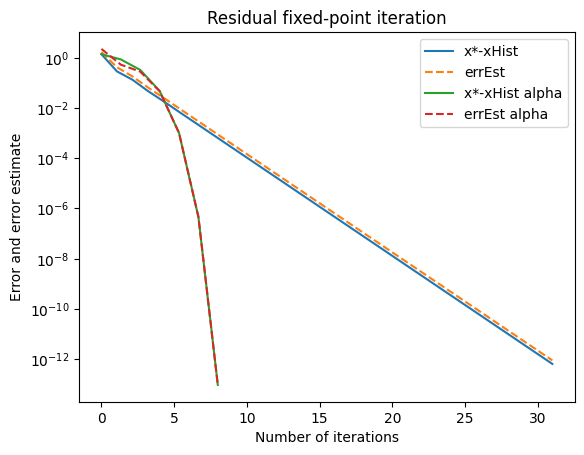

In [48]:
#Here we plot the new error and error estimate for the newly defined function and its derivative
#as well as the last error and estimate giving a total of 4 curves
plt.figure(2)
plt.semilogy(xvals_error,list_of_errors2)
plt.semilogy(xvals_error,err2, '--')
plt.semilogy(xvals_error3,list_of_errors3)
plt.semilogy(xvals_error3,err3, '--')
plt.legend(['x*-xHist', 'errEst','x*-xHist alpha','errEst alpha'])
plt.xlabel('Number of iterations')
plt.ylabel('Error and error estimate')
plt.title('Residual fixed-point iteration')
print(f"The convergence order is {convergence_order3[-1]}")
print(f"The asymptotic factor is {asym_convergence3}")

**DISCUSSION QUESTION A.3:** Explain values of convergence order and aysmptotic convergence factor as well as why the error estimate is much more accurate


The convergence order is approximately 2 for all the iterations. The asymptotic convergence factor is approximately 0. This is because the iteration function is different so it converges faster. And the asymptotic factor is almost 0 because the convergence is faster.

The estimate is more accurate because now it converges faster, so the intervals become quadratically smaller.

NEWTON METHOD

In [49]:
# Function that finds the solution of an equation  or system  of equations
# using the Newton method
#
# Possible usages:
# x, success, errEst, xHist = newton(phi, x0, tol, maxit)
# x, success, errEst, xHist = newton(phi, x0, tol)
# x, success, errEst, xHist = newton(phi, x0)
# x, success, errEst, _ = newton(phi, x0, tol, maxit)
# x, success, errEst, _ = newton(phi, x0, tol)
# x, success, errEst, _ = newton(phi, x0)
#
# INPUT:
# f             function handling (may be vector valued)
# df            derivative of f (or function returning Jacobian matrix)
# x0            initial guess
# tol           desired toleraance to stop iterations
# maxit         maximum number of iterations
#
# OUTPUT:
# x             solution at the final iteration
# success       true means converged according to error estimator
# errEst        array with error estimate per iterations
# xHist         array with solutions per iterations
#

#Define newton function for including the fpIterator
def newton(f, df, x0, tol=1e-8, maxit=20, *args):

    x, success, errEst, xHist = fpIterator(lambda x:x-f(x)/df(x), x0, tol, maxit)

    # implementation should be trivial using your fpIterator with a properly
    # implemented function phi

    return x, success, errEst, xHist

In [50]:
x4, s4, err4, hist4 = newton(f1, deriv_f1, -2, 1e-12, 20)
print(x4)

-0.6180339887498948


In [51]:
xvals_error4 = np.linspace(0,len(hist4),len(hist4)-1)
list_of_errors4 = []
for k in range(len(hist4)-1):
    list_of_errors4.append(abs(x_2-hist4[k]))

In [52]:
#Convergence order and asymptotic convergence
convergence_order2 = []
for i in range(len(list_of_errors4)-2):
    convergence_order2.append((np.log(list_of_errors4[i+2]/list_of_errors4[i+1]))/(np.log(list_of_errors4[i+1]/list_of_errors4[i])))
n = 2
asym_convergance2 = (list_of_errors4[-1])/(list_of_errors4[-2])**n

The convergence order is 1.9998698335259109
The asymptotic convergence factor is 0.447256554025116


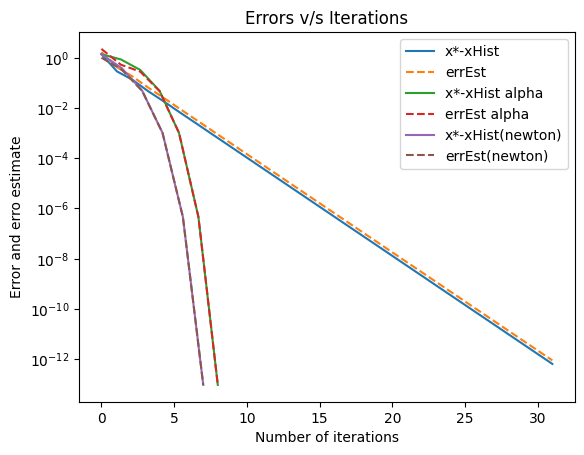

In [53]:
# Plot of the previous 4 lines corresponding to the fixed-point and residual fixed-point iteration errors and error estiamte
# as well as the error and error estimate obtained using the Newton method v/s the number of iterations
plt.figure(3)
plt.semilogy(xvals_error,list_of_errors2)
plt.semilogy(xvals_error,err2, '--')
plt.semilogy(xvals_error3,list_of_errors3)
plt.semilogy(xvals_error3,err3, '--')
plt.semilogy(xvals_error4,list_of_errors4)
plt.semilogy(xvals_error4,err4, '--')
plt.xlabel('Number of iterations')
plt.ylabel('Error and erro estimate')
plt.title('Errors v/s Iterations')
plt.legend(['x*-xHist', 'errEst','x*-xHist alpha','errEst alpha','x*-xHist(newton)','errEst(newton)'])
print(f"The convergence order is {convergence_order2[-1]}")
print(f"The asymptotic convergence factor is {asym_convergance2}")

**Discussion A:4:** Explain convergence order and asymptotic factor and discuss which method is better

The convergence order the 2 and the convergence factor is 0.45 approximately. This is because it converges fast because of the derivatives (same case as before for the residual), but as for the factor, it is higher this time because the speed of convergence is higher since this method used the functions and its derivatives.

And Newton is better because in most cases it has a faster convergence rate and easy definition using the derivatives. But if this derivatives are 0 or close to 0 then the method behaves poorly.


Text(0.5, 1.0, 'F2(x)')

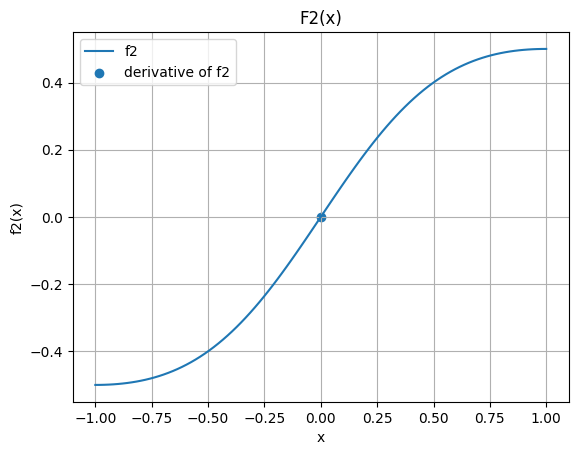

In [54]:
#Define the new function and its derivative to plot it in the interval [-1,1] and find its only root.

def f2(x):
    return x/(1+x**2)
def deriv_f2(x):
    return (1-x**2)/(1+x**2)**2
xvals_f2 = np.linspace(-1,1,100)

plt.plot(xvals_f2,f2(xvals_f2))
plt.scatter(0,0)
plt.grid()
plt.legend(['f2', 'derivative of f2'])
plt.xlabel('x')
plt.ylabel('f2(x)')
plt.title('F2(x)')

[0.2, -0.01666666666666669, 9.261831990365482e-06, -1.5889880692699157e-15, 0.0] [0.57, -0.5486387201896014, 0.4725142886060517, -0.2716468140004017, 0.04328478964196031, -0.00016249888112841726, 8.581854194292249e-12] [0.58, -0.5880409885473178, 0.621637317395742, -0.7830314448205599, 2.482057307414223, 5.9260388988882315, 12.199463332457533]
[0.19230769230769232, -0.016662038322688165, 9.261831989570987e-06, -1.5889880692699157e-15, 0.0] [0.4302211487659446, -0.4217039551058305, 0.3862715377958274, -0.25297899047153677, 0.04320384408556547, -0.00016249887683749038, 8.581854194292249e-12] [0.4340017958695001, -0.4369478339278691, 0.448371712048775, -0.48540876638314473, 0.34662659120194705, 0.16407467829016728, 0.08142371547757239]


Text(0, 0.5, 'xk')

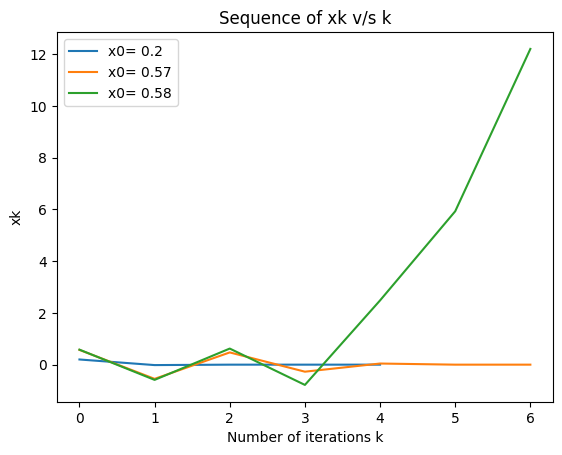

In [55]:
#Define function and derivative to plot sequence of xk v/s number of iterations
def f2(x):
    return x/(1+x**2)
def deriv_f2(x):
    return (1-x**2)/(1+x**2)**2
xvals_f2 = np.linspace(-1,1,100)

#With the same function as before we find the root using 3 different initial values: 0.2, 0.57 and 0.58

y02 = []
y057 = []
y058 = []
k_list = [1,2,3,4,5]

x02 = newton(f2, deriv_f2, 0.2, 1e-12, 6)[3]
x057 = newton(f2, deriv_f2, 0.57, 1e-12, 6)[3]
x058 = newton(f2, deriv_f2, 0.58, 1e-12, 6)[3]

for i in range(len(x02)):
    y02.append(f2(x02[i]))

for i in range(len(x057)):
    y057.append(f2(x057[i]))

for i in range(len(x058)):
    y058.append(f2(x058[i]))

print(x02,x057,x058)
print(y02,y057,y058)

plt.figure(4)
plt.plot(np.arange(0,len(x02),1),x02)
plt.plot(np.arange(0,len(x057),1),x057)
plt.plot(np.arange(0,len(x058),1),x058)
plt.title('Sequence of xk v/s k')
plt.legend(['x0= 0.2', 'x0= 0.57', 'x0= 0.58'])
plt.xlabel('Number of iterations k')
plt.ylabel('xk')

**DISCUSSION QUESTION A.5:** Explain numerical results

The higher the initial guess, then  further away from the root the value is; and the function eventually diverges as the number of iterations increases.

# **B. Root finding for systems of nonlinear equations**

FIXED-POINT ITERATION

In [56]:
#Define iterator for the systems of equations where one needs to take into consideration the possibility that
#the matrices might be singular and also adding the 2-norm for the error estimate

def fpIterator_sys(phi, x0, tol=1e-8, maxit=20):
    errEst = []
    xHist = [x0]
    success = False
    x=x0
    for i in range(maxit):
        try:
            1/(xHist[i]-1)
        except ZeroDivisionError:
            x=xHist[i]
            break
        xHist.append(phi(xHist[i]))
        errEst.append(abs(xHist[i+1]-xHist[i]))
        if abs(np.linalg.norm(errEst[i]))<tol:
            success = True
            x = xHist[i+1]
        break

    return x, success, errEst, xHist

In [57]:
#New Newton for the system of equations
def newton_sys(F, Jacob, x0, tol=1e-8, maxit=20, *args):

    #Define new phi for system to take the inverse of the jacobian and also the dot product between jacobian and function
    phi_sys = lambda x: x - np.dot(F(x),np.linalg.inv(Jacob(x)))
    x, success, errEst, xHist = fpIterator_sys(phi_sys, x0, tol, maxit)

    return x, success, errEst, xHist

RESIDUAL FIXED-POINT ITERATION

> Add blockquote



In [58]:
#Define F and Jacobian

def F(x):
    #n = (np.array([x[0], 2*x[1]]))/(np.sqrt(x[0]+2*x[1]))
    n = np.array([1/np.sqrt(2), 2/np.sqrt(2)])/1.456475315
    z = np.array([2,1])/np.sqrt(2)
    t = np.array([2*x[1], x[0]]) / (np.sqrt(x[0]+2*x[1]))

    F1 = ((x[0]/2)**2 +x[1]**2 -1)
    F2 = np.dot(n,x-z) -0.5 -0.5*(np.dot(t,(x-z)))**2 #here p has to be changed manually
    #np.dot is the same as mat.mul for 2d arrays
    return np.array([F1, F2])

def Jacob(x):
    #n = (np.array([x[0], 2*x[1]]))/(np.sqrt(x[0]+2*x[1]))
    n = np.array([1/np.sqrt(2), 2/np.sqrt(2)])/1.456475315
    z = np.array([2,1])/np.sqrt(2)
    t = np.array([2*x[1], x[0]]) / (np.sqrt(x[0]+2*x[1]))

    J1 = np.array([[x[0]/2], [2*x[1]]])
    J2 = np.array(n - np.dot(t, np.dot(t, x-z)))

    return np.array([J1[0][0], J1[1][0], J2[0], J2[1]]).reshape(2,2)

#Initial conditions
x = [1,1]
#n = (np.array([x[0], 2*x[1]]))/(np.sqrt(x[0]+2*x[1]))
z = np.array([2,1])/np.sqrt(2)
n = np.array([1/np.sqrt(2), 2/np.sqrt(2)])/1.456475315
#t = np.array([2*x[1], -x[0]]) / (np.sqrt(x[0]+2*x[1]))
t = np.array([n[1], -n[0]])
xpos = z + 2*(n+t)
xneg = z + 2*(n-t)
print(n)
print(z)
print(t)
print(xpos)
print(xneg)

[0.48549177 0.97098354]
[1.41421356 0.70710678]
[ 0.97098354 -0.48549177]
[4.32716419 1.67809032]
[0.44323002 3.62005741]


In [59]:
solution1, spos, errEstpos, xHistpos = newton_sys(F, Jacob, xpos, 1e-8, 20)
solution2, sneg, errEstneg, xHistneg = newton_sys(F, Jacob, xneg, 1e-8, 20)

#print(Jacob(x))
print(solution1)
print(solution2)
# print(solution2,sneg)
# print(xHistpos)
#print(xHistneg)
#print(F(x))
#print(np.linalg.inv(Jacob(x)))

[4.32716419 1.67809032]
[0.44323002 3.62005741]


Text(0.5, 1.0, 'Sequence xk v/s number of iterations')

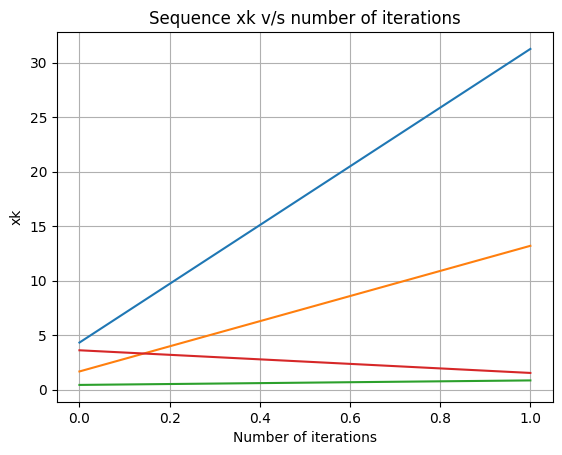

In [64]:
#Plot sequences xk for the system of linear equations
y_neg =[]
y_pos = []

x_pos = newton_sys(F, Jacob, xpos, 1e-12, 20)[3]
x_neg = newton_sys(F, Jacob, xneg, 1e-12, 20)[3]

plt.figure(6)
plt.plot(np.arange(0,len(x_pos),1),x_pos)
plt.plot(np.arange(0,len(x_neg),1),x_neg)
plt.xlabel('Number of iterations')
plt.ylabel('xk')
plt.grid()
plt.title('Sequence xk v/s number of iterations')

In [65]:
print(x_pos)

[array([4.32716419, 1.67809032]), array([31.25556172, 13.20046825])]


In [66]:
# plotResidual_partB
#
# INPUT
# p         parameter which shifts the parabola

def plotResidual_partB(p):

    plt.figure(figsize=(8,5))

    nHat = np.array([0.5, 1])
    nHat = nHat/np.linalg.norm(nHat)
    tHat = np.array([nHat[1], -nHat[0]])
    xHat = np.array([[2],[1]])/np.sqrt(2)

    # For plotting the curves we parametrize them using angle (F1) and tangential co-ordinate (F2)
    par1 = lambda theta, p:  np.array([[2*np.cos(theta)], [np.sin(theta)]])
    par2 = lambda t, p: np.outer((tHat), t) + np.outer( (nHat), (np.matmul(nHat,xHat) + (p+0.5*np.power(t-np.matmul(tHat,xHat), 2)) ) )
    parametrizations = [par1, par2]

    paramRanges = [[0, 2*np.pi], [-1, 2.5]]
    paramStyles = ['r-','r--']

    N = 100;
    xLim = [-5, 5]
    yLim = [-2.5, 3.5]

    # Plot contours of the error
    xVals = np.linspace(xLim[0], xLim[1], N)
    yVals = np.linspace(yLim[0], yLim[1], N)
    X, Y = np.array( np.meshgrid(xVals, yVals, indexing='xy') )

    s1 = lambda x,y: np.power( np.power(x/2, 2) + np.power(y, 2) - 1, 2)
    s2 = lambda x,y: np.power( nHat[0]*x + nHat[1]*y -np.matmul(nHat, xHat) - (p+0.5*np.power( (tHat[0]*x+tHat[1]*y-np.matmul(tHat, xHat)),2 )) ,2 )
    errFun = lambda x, y: np.sqrt(s1(x,y) + s2(x,y))
    Z = np.log10(errFun(X, Y))

    levels = np.arange(-2, 1, 0.25)
    plt.contourf( xVals, yVals, Z, levels )

    # Add parametrized curves
    i = 0
    for pdx in parametrizations:
        params = np.linspace(paramRanges[i][0], paramRanges[i][1], N)
        xyCoords = pdx(params, p)

        if i == 1:
            x = xyCoords[0, :]
            y = xyCoords[1, :]
        else:
            x = xyCoords[0, :][0]
            y = xyCoords[1, :][0]

        plt.plot(x, y, paramStyles[i])

        i += 1
    plt.colorbar()
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$x_2$', fontsize=16)
    plt.title('Colormap corresponds to $\log_{{10}}\sqrt{{F_1^2 + F_2^2}}$, where $p = %4.2f $' % p, fontsize=16)

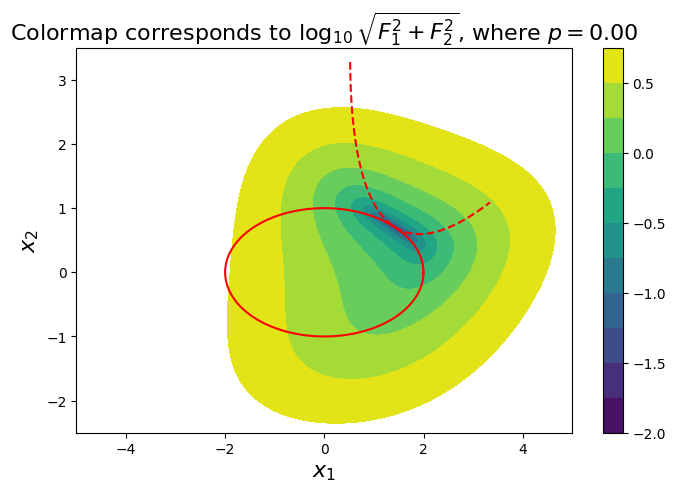

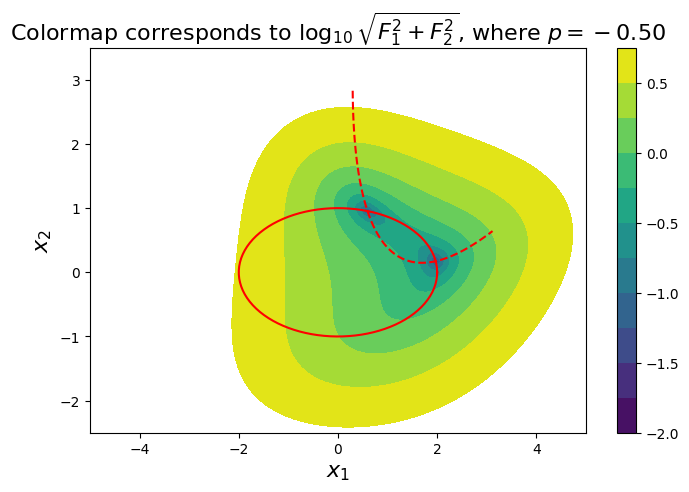

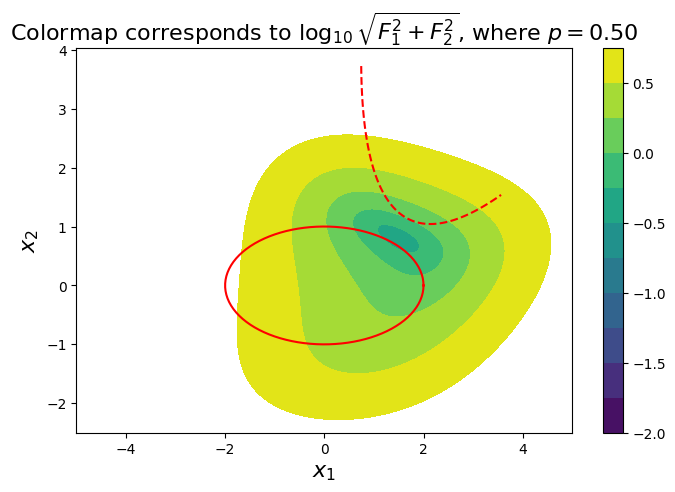

In [67]:
plotResidual_partB(0)
plotResidual_partB(-0.5)
plotResidual_partB(0.5)

**DISCUSSION QUESTION B.1:**

From the colormaps we can conclude that for p=-0.5 the method converges with order 2. For p=0, it converges with order 1 and for p = 0.5 it does not converge at all. To see if it converges, one needs to look at whether F1(x)=0 and F2(x)=0 intersect, and in how many points (which results in the determination of the order).

# **C. Iterative solution to linear systems of equations**


In [68]:
def fpIterator2(phi, x0, tol=1e-8, maxit=20):

    # initialize your output variables here (x, errEst, xHist)
    errEst = []
    xHist = [x0]
    success = False
    x=x0
    for i in range(maxit):
        try:
            1/(xHist[i]-1)
        except ZeroDivisionError:
            x=xHist[i]
            break
        xHist.append(phi(xHist[i]))
        errEst.append(abs(xHist[i+1]-xHist[i]))
        if abs(np.linalg.norm(errEst[i]))<tol:
            success = True
            x = xHist[i+1]
            break
    # loop (at most maxit iterations) to find the root; possible strategies
    # >>> for loop (recommended)
    # >>> while loop
    # inside the loop you will have to compute the new guess for the root and
    # check for convergence, i.e. check if the error at the current iteration
    # reached the tolerance
    # if yes >>> break
    # if no >>> update the previous iteration x and iterate again

    # finally, update the success variable

    return x, success, errEst, xHist

In [69]:
# INPUT
# A             NxN matrix
# b             Nx1 right-hand side
# method        boolean, if True >> static, if False >> dynamic
# x0            (optional) initial guess
# tol           (optional) desired tolerance
# maxIt         (optional) maximum number of iterations
# alpha0        (optional) static parameter,
#               if not provided (alpha0=10) >>> dynamic Richardson
#
# OUTPUT
# x             approximate solution (last computed)
# success       true means converged according to error estimator
# errEst        error estimate per iteration = norm(x(k+1)-x(k))
# xHist         (optional) array with intermediate solutions

def richardson(A, b, method, x0, tol=1e-6, maxit=100, alpha0=10.):

    #for i in range(maxit): iteration for the dynamic case
    #static method
    if method == 'static':
        def phi_static(x):
            return x + alpha0*(b-np.dot(A,x))

        x, success, errEst, xHist = fpIterator2(phi_static, x0, tol=1e-8, maxit=1000)
    #dynamic method
    elif method == 'dynamic':

        def phi_dynamic(x):
            res = b - np.dot(A,x) #residual
            #for alpha dynamic we took the raito of the norms, the numerator is as written in the theory and
            #the denominator since the order is a the matrix A we followed the theory and wrote the product of the
            # resiudal matrix defined above with the transpose of res times the matrix A
            res_norm = np.dot(np.transpose(res), A)
            alpha_dyn = (np.linalg.norm(res,2)**2)/(np.dot(res_norm, res))

            return x + alpha_dyn*res

        x, success, errEst, xHist = fpIterator2(phi_dynamic, x0, tol=1e-6, maxit=1000)

    else:
        None
    # we want to solve Ax = b
    # the method can be written as a fixed point iteration:
    #       x_{k+1} = G(x_{k})
    # where
    #       G(x_{k}) = x_{k} - alpha_{k} * r_{k} =
    #                = x_{k} + alpha_{k} * (b - A*x_{k})

    # you can use an if statement to generate static and dynamic inside the
    # function

    return x, success, errEst, xHist


In [70]:
# Test the implementation on the example problem (7) including also the definition of both matrices A1 and A2
A_test = np.array([[2, -1],[-1, 2]])
A_test2 = np.array([[1.1,-1],[-1,1.1]])
b_test = np.array([1, 0])
x0_test = np.array([0,0])

xR, sR, errEstR, xHistR = richardson(A_test, b_test, 'static', x0_test, alpha0=0.5)
print(xR)
#print(sR)
#print(xHistR)
print(len(xHistR))

#print(np.linalg.eig(A_test))

[0.66666666 0.33333333]
28


In [71]:
xR, sR, errEstR, xHistR = richardson(A_test, b_test, 'dynamic', x0_test, alpha0=0.5)
print(xR,sR)

[0.66666603 0.33333302] True


<ipython-input-68-70c53f8e24c7>:10: RuntimeWarning: divide by zero encountered in divide
  1/(xHist[i]-1)


The function should not converge for values over 0.6666666666666666
The alpha opt is: 0.5


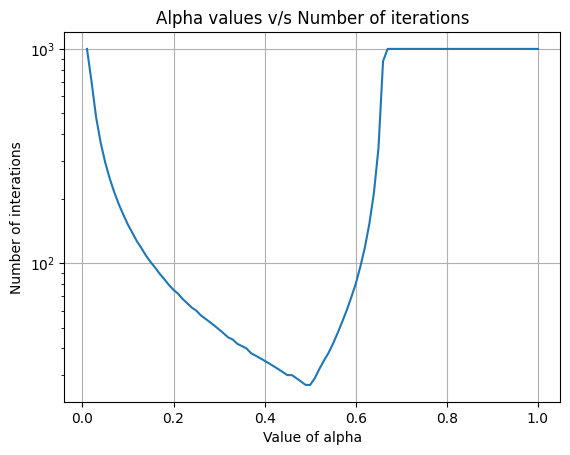

In [72]:
#Define number of iterations for the alpha values
num_of_iter = []
i_range = np.arange(1,101,1)
alpha_range = []
for i in range(100):
    alpha_range.append(i_range[i]/100)
for i in range(1,101):
    alpha2 = i/100
    xR, sR, errEstR, xHistR = richardson(A_test, b_test, 'static', x0_test, alpha0=alpha2)

    num_of_iter.append(len(xHistR)-1) # -1 becuse there is also x0 in xHist


#Plot of the different alpha values with the respect to the number of iterations for the static case
plt.semilogy(alpha_range, num_of_iter)
plt.xlabel('Value of alpha')
plt.ylabel('Number of interations')
plt.title('Alpha values v/s Number of iterations')
plt.grid()
min(num_of_iter)
min_index = np.where(np.array(num_of_iter) == 10)[0]

#plt.scatter([alpha_range[min_index[0]],alpha_range[min_index[1]],alpha_range[min_index[2]]],[10, 10, 10])
#print('Values of alpha with least iterations',alpha_range[min_index[0]],alpha_range[min_index[1]],alpha_range[min_index[2]])
maximum_eig_A = max(np.linalg.eig(A_test)[0])
minimum_eig_A = min(np.linalg.eig(A_test)[0])
alpha_opt = 2/(max(np.linalg.eig(A_test)[0])+min(np.linalg.eig(A_test)[0]))
print('The function should not converge for values over', 2/maximum_eig_A)
print('The alpha opt is:', alpha_opt)


**DISCUSSION QUESTION C.1:** For which range of α’s the Richardson iteration leads to convergence? For which value of α the number of iterations is minimized?

- The Richardson leads to convergence for values of alpha smaller then 0.666, which is shown of the graph and from the theory bc 2/max_eigen_A is equal to 0.666. Also the alpha should be bigger then 0

- The number of iterations is minimized for alpha 0.48 0.49 0.5 as seen in the graph, which makes sense considering that alpha opt is equal to 0.5 by taking 2/(max_eigen_A+min_eigen_A)


[0.66666666 0.33333333] [array([0, 0]), array([0.5, 0. ]), array([0.5 , 0.25]), array([0.625, 0.25 ]), array([0.625 , 0.3125]), array([0.65625, 0.3125 ]), array([0.65625 , 0.328125]), array([0.6640625, 0.328125 ]), array([0.6640625 , 0.33203125]), array([0.66601562, 0.33203125]), array([0.66601562, 0.33300781]), array([0.66650391, 0.33300781]), array([0.66650391, 0.33325195]), array([0.66662598, 0.33325195]), array([0.66662598, 0.33331299]), array([0.66665649, 0.33331299]), array([0.66665649, 0.33332825]), array([0.66666412, 0.33332825]), array([0.66666412, 0.33333206]), array([0.66666603, 0.33333206]), array([0.66666603, 0.33333302]), array([0.66666651, 0.33333302]), array([0.66666651, 0.33333325]), array([0.66666663, 0.33333325]), array([0.66666663, 0.33333331]), array([0.66666666, 0.33333331]), array([0.66666666, 0.33333333]), array([0.66666666, 0.33333333])]
[0.66666603 0.33333302] [array([0, 0]), array([0.5, 0. ]), array([0.5 , 0.25]), array([0.625, 0.25 ]), array([0.625 , 0.3125]

Text(0.5, 1.0, 'Static and Dynamic errors for matrix A_test')

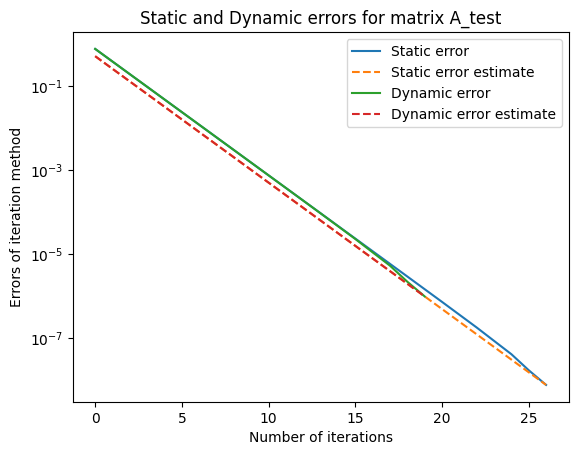

In [73]:
#Richardson method considering both static and dynamic alpha parameters
xR3, sR3, errEstR3, xHistR3 = richardson(A_test, b_test, 'static', x0_test, alpha0=alpha_opt, tol=1e-8)
print(xR3, xHistR3)
Richard_error = []
Richard_error_est = []
for i in range(len(xHistR3)-1):
    Richard_error.append(np.linalg.norm(xR3-xHistR3[i],2))
    Richard_error_est.append(np.linalg.norm(xHistR3[i+1]-xHistR3[i],2))

x_vals_R3 = np.arange(0,len(xHistR3)-1,1)

xRd, sRd, errEstRd, xHistRd = richardson(A_test, b_test, 'dynamic', x0_test, alpha0=alpha_opt, tol=1e-8)
print(xRd, xHistRd)
Richard_error_dyn = []
Richard_error_est_dyn = []
for i in range(len(xHistRd)-1):
    Richard_error_dyn.append(np.linalg.norm(xRd-xHistRd[i],2))
    Richard_error_est_dyn.append(np.linalg.norm(xHistRd[i+1]-xHistRd[i],2))

plt.figure(28)
x_vals_Rd = np.arange(0,len(xHistRd)-1,1)


#Plot of the errors and estimates for both static and dynamic cases
plt.semilogy(x_vals_R3,Richard_error)
plt.semilogy(x_vals_R3,Richard_error_est,ls='dashed')
plt.semilogy(x_vals_Rd,Richard_error_dyn)
plt.semilogy(x_vals_Rd,Richard_error_est_dyn,ls='dashed')
plt.xlabel('Number of iterations')
plt.ylabel('Errors of iteration method')
plt.legend(["Static error","Static error estimate","Dynamic error","Dynamic error estimate"])
plt.title('Static and Dynamic errors for matrix A_test')

[5.23809519 4.76190472] [array([0, 0]), array([0.90909091, 0.        ]), array([0.90909091, 0.82644628]), array([1.66040571, 0.82644628]), array([1.66040571, 1.50945974]), array([2.28132703, 1.50945974]), array([2.28132703, 2.07393367]), array([2.79448515, 2.07393367]), array([2.79448515, 2.54044105]), array([3.21858277, 2.54044105]), array([3.21858277, 2.92598434]), array([3.56907667, 2.92598434]), array([3.56907667, 3.24461515]), array([3.85874105, 3.24461515]), array([3.85874105, 3.50794641]), array([4.0981331 , 3.50794641]), array([4.0981331 , 3.72557554]), array([4.29597777, 3.72557554]), array([4.29597777, 3.90543433]), array([4.45948576, 3.90543433]), array([4.45948576, 4.05407796]), array([4.59461633, 4.05407796]), array([4.59461633, 4.17692394]), array([4.70629449, 4.17692394]), array([4.70629449, 4.27844953]), array([4.79859048, 4.27844953]), array([4.79859048, 4.36235499]), array([4.87486817, 4.36235499]), array([4.87486817, 4.43169834]), array([4.93790758, 4.43169834]), arr

Text(0.5, 1.0, 'Static and Dynamic errors for matrix A_test2')

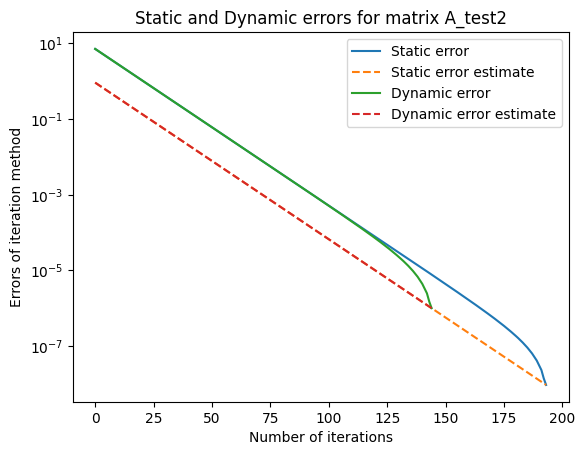

In [74]:
#Define new alpha opt for the new matrix
alpha_opt2 = 2/(max(np.linalg.eig(A_test2)[0])+min(np.linalg.eig(A_test2)[0]))

#Richardson method for the static and dynamic cases implementing the new matrix
xR4, sR4, errEstR4, xHistR4 = richardson(A_test2, b_test, 'static', x0_test, alpha0=alpha_opt2, tol=1e-8)
print(xR4, xHistR4)
Richard_error4 = []
Richard_error_est4 = []
for i in range(len(xHistR4)-1):
    Richard_error4.append(np.linalg.norm(xR4-xHistR4[i],2))
    Richard_error_est4.append(np.linalg.norm(xHistR4[i+1]-xHistR4[i],2))

x_vals_R4 = np.arange(0,len(xHistR4)-1,1)

xRd2, sRd2, errEstRd2, xHistRd2 = richardson(A_test2, b_test, 'dynamic', x0_test, alpha0=alpha_opt2, tol=1e-8)
print(xRd2, xHistRd2)
Richard_error_dyn2 = []
Richard_error_est_dyn2 = []
for i in range(len(xHistRd2)-1):
    Richard_error_dyn2.append(np.linalg.norm(xRd2-xHistRd2[i],2))
    Richard_error_est_dyn2.append(np.linalg.norm(xHistRd2[i+1]-xHistRd2[i],2))

plt.figure(29)
x_vals_Rd2 = np.arange(0,len(xHistRd2)-1,1)


#Plot the errors and estimates with the new matrix A and for static and dynamic alphas
plt.semilogy(x_vals_R4,Richard_error4)
plt.semilogy(x_vals_R4,Richard_error_est4,ls='dashed')
plt.semilogy(x_vals_Rd2,Richard_error_dyn2)
plt.semilogy(x_vals_Rd2,Richard_error_est_dyn2,ls='dashed')
plt.xlabel('Number of iterations')
plt.ylabel('Errors of iteration method')
plt.legend(["Static error","Static error estimate","Dynamic error","Dynamic error estimate"])
plt.title('Static and Dynamic errors for matrix A_test2')

**DISCUSSION QUESITON C.2:**

- The difference between the speed of convergence for both matrices depends is the value of their respective eigenvalues, and since the alpha opt depends on these, then it causes the convergence to be either faster or slower

- The pro for static is the simplicity of the method, on the contrary the dynamic one is way more complex
- The con is the speed of convergarnce for the static one, on the contrary the dynamic one converges faster